In [31]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [32]:
#Extract data
df = pd.read_csv('117 01Students.csv')
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [33]:
#Data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [34]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [35]:
#Data preprocessing
x = df['Hours'].values.reshape(-1, 1)
y = df['Marks']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
x_train.shape

(21, 1)

In [38]:
x_test.shape

(9, 1)

In [39]:
y_train.shape

(21,)

In [40]:
y_test.shape

(9,)

In [41]:
#Train model
from sklearn.linear_model import LinearRegression

In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

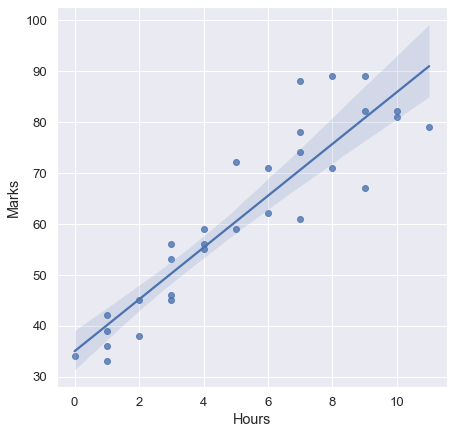

In [43]:
#Just visualizing the data
sns.regplot(x=df["Hours"],y=df["Marks"])

In [44]:
#Test on x
y_hat = lr.predict(x_test)
y_hat

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [45]:
y_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

In [46]:
#R2 score
lr.score(x_train, y_train)

0.8111744903394345

In [47]:
lr.score(x_test, y_test)

0.8538655334937387

In [48]:
#Root mean square error
from sklearn.metrics import mean_squared_error

In [49]:
np.sqrt(mean_squared_error(x_test, y_test))

63.42624763367993

In [50]:
#Test model on random data
lr.predict([[4.5]])

array([57.4494523])

In [51]:
lr.predict([[6.5]])

array([67.48459607])

In [52]:
#Model parameters
lr.coef_ 

array([5.01757188])

In [53]:
lr.intercept_ 

34.87037882245551

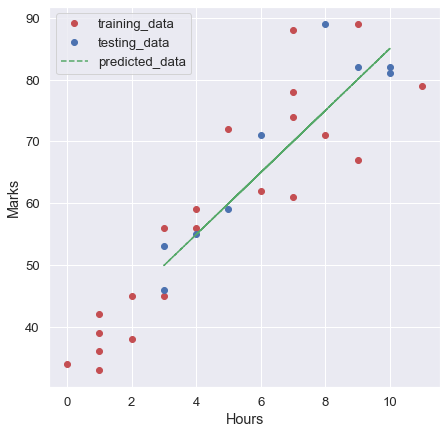

In [54]:
#Visualize model
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_hat, 'g--', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()